# 07 - Scatter plots for entire human T1 dataset

In [1]:
from pathlib import Path
import pandas as pd
import json
import nibabel as nib
import numpy as np

from src.database import *
import matplotlib.pyplot as plt
plt.style.use('custom_matplotlibrc')
plt.rcParams["figure.figsize"] = (20,5)
fig_id = 0

In [2]:
output_folder = Path("plots/07_wholedataset_scatter_Human/")

## Load database

In [3]:
df = pd.read_pickle('databases/3T_human_T1maps_database.pkl')

In [4]:
genu_mean = np.array([])
genu_std = np.array([])
splenium_mean = np.array([])
splenium_std = np.array([])
deepgm_mean = np.array([])
deepgm_std = np.array([])
cgm_mean = np.array([])
cgm_std = np.array([])

ii = 0
for index, row in df.iterrows():
    genu_mean = np.append(genu_mean, np.mean(df.loc[index]['T1 - genu (WM)']))
    genu_std = np.append(genu_std, np.std(df.loc[index]['T1 - genu (WM)']))
    splenium_mean = np.append(splenium_mean, np.mean(df.loc[index]['T1 - splenium (WM)']))
    splenium_std = np.append(splenium_std, np.std(df.loc[index]['T1 - splenium (WM)']))
    deepgm_mean = np.append(deepgm_mean, np.mean(df.loc[index]['T1 - deep GM']))
    deepgm_std = np.append(deepgm_std, np.std(df.loc[index]['T1 - deep GM']))
    cgm_mean = np.append(cgm_mean, np.mean(df.loc[index]['T1 - cortical GM']))
    cgm_std = np.append(cgm_std, np.std(df.loc[index]['T1 - cortical GM']))
    ii = ii +1

/Users/mathieuboudreau/opt/anaconda3/envs/rrsg_analysis/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/mathieuboudreau/opt/anaconda3/envs/rrsg_analysis/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/mathieuboudreau/opt/anaconda3/envs/rrsg_analysis/lib/python3.7/site-packages/numpy/core/_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/mathieuboudreau/opt/anaconda3/envs/rrsg_analysis/lib/python3.7/site-packages/numpy/core/_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/Users/mathieuboudreau/opt/anaconda3/envs/rrsg_analysis/lib/python3.7/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / r

In [5]:
indexes = df.index

In [6]:
def plot_single_scatter(x, y, y_std,
                        title, x_label, y_label,
                        file_prefix, folder_path, fig_id,
                        y_type):
    plt.errorbar(x,y, y_std, fmt='o', solid_capstyle='projecting', capsize=5)
    plt.title(title, fontsize=30)
    plt.xlabel(x_label, fontsize=26)
    plt.ylabel(y_label, fontsize=26)
    if y_type is 'site':
        plt.xticks(np.arange(0, np.max(indexes), step=1))
    elif y_type is 'meas':
        plt.xticks(rotation=90)
    fig = plt.gcf()
    
    folder_path.mkdir(parents=True, exist_ok=True)
    
    if fig_id<10:
        filename = "0" + str(fig_id) + "_" + file_prefix + "_" + str(y_type)
    else:
        filename = str(fig_id) + "_" + file_prefix + "_" + str(y_type)

    fig.savefig(folder_path / (str(filename) + '.svg'), facecolor='white')
    fig.savefig(folder_path / (str(filename) + '.png'), facecolor='white')
    fig_id = fig_id + 1
    plt.show()
    return fig_id

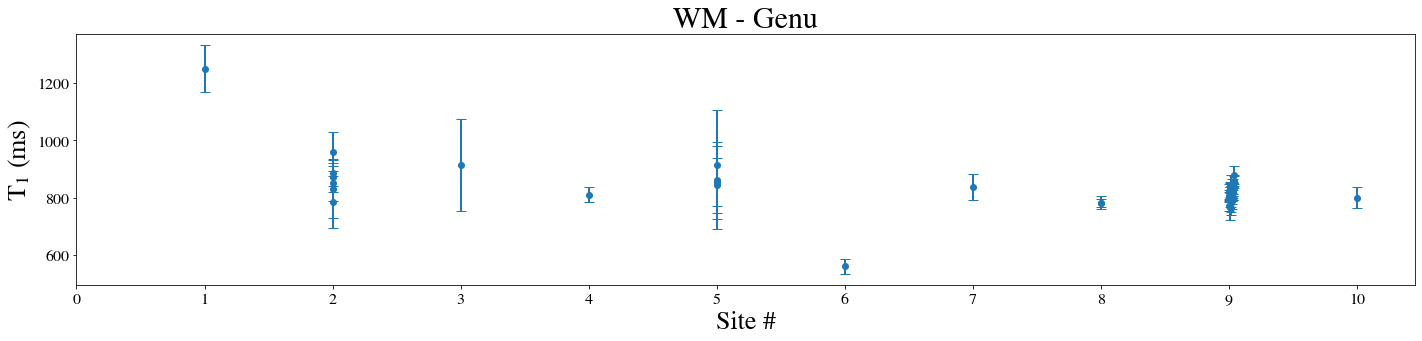

In [7]:
fig_id = plot_single_scatter(x=indexes,
                              y=genu_mean,
                              y_std=genu_std,
                              title='WM - Genu',
                              x_label='Site #',
                              y_label="T$_1$ (ms)",
                              file_prefix="WM_genu",
                              folder_path=output_folder,
                              fig_id=fig_id,
                              y_type='site')

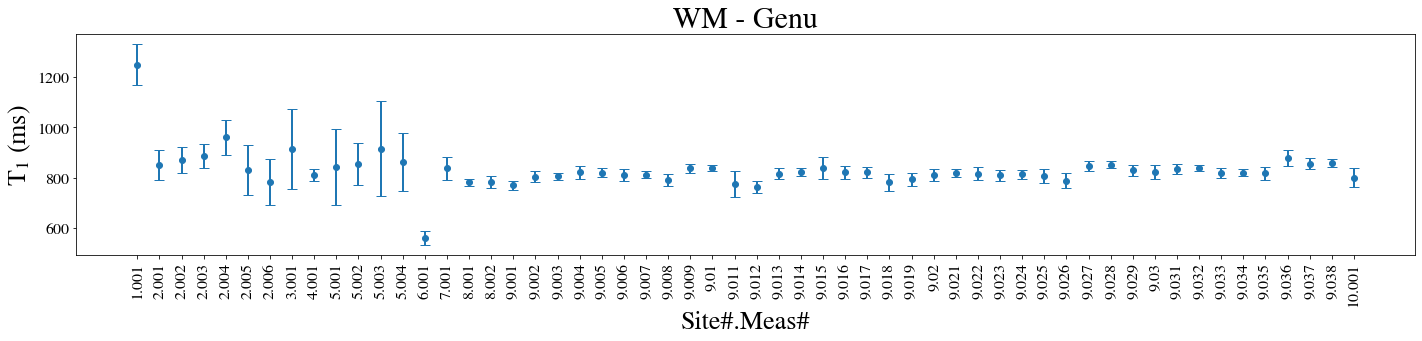

In [8]:
fig_id = plot_single_scatter(x=indexes.map(str),
                             y=genu_mean,
                             y_std=genu_std,
                             title='WM - Genu',
                             x_label='Site#.Meas#',
                             y_label="T$_1$ (ms)",
                             file_prefix="WM_genu",
                             folder_path=output_folder,
                             fig_id=fig_id,
                             y_type='meas')

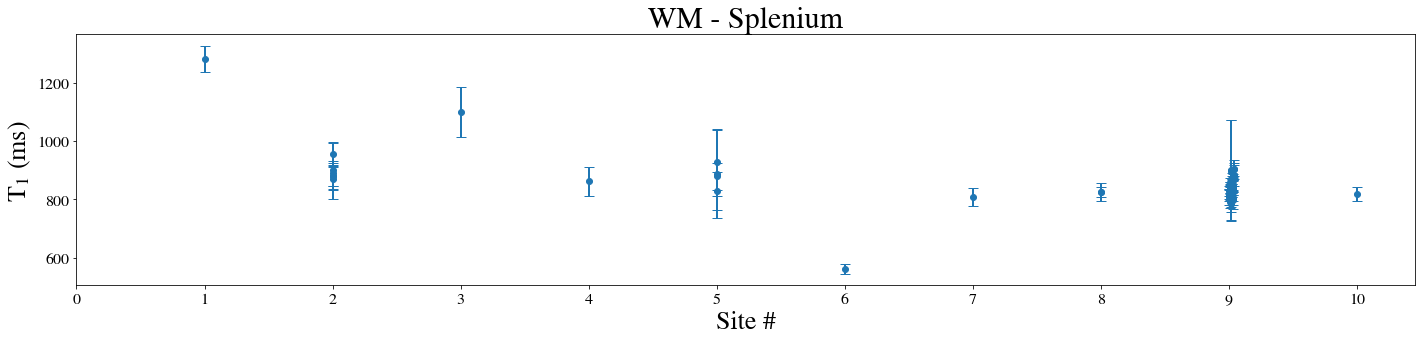

In [9]:
fig_id = plot_single_scatter(x=indexes,
                             y=splenium_mean,
                             y_std=splenium_std,
                             title='WM - Splenium',
                             x_label='Site #',
                             y_label="T$_1$ (ms)",
                             file_prefix="WM_splenium",
                             folder_path=output_folder,
                             fig_id=fig_id,
                             y_type='site')

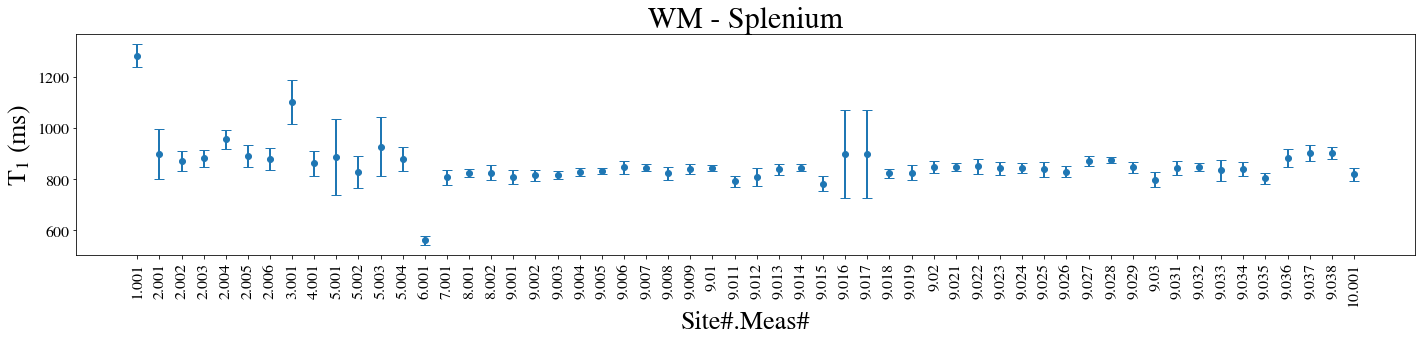

In [10]:
fig_id = plot_single_scatter(x=indexes.map(str),
                             y=splenium_mean,
                             y_std=splenium_std,
                             title='WM - Splenium',
                             x_label='Site#.Meas#',
                             y_label="T$_1$ (ms)",
                             file_prefix="WM_splenium",
                             folder_path=output_folder,
                             fig_id=fig_id,
                             y_type='meas')

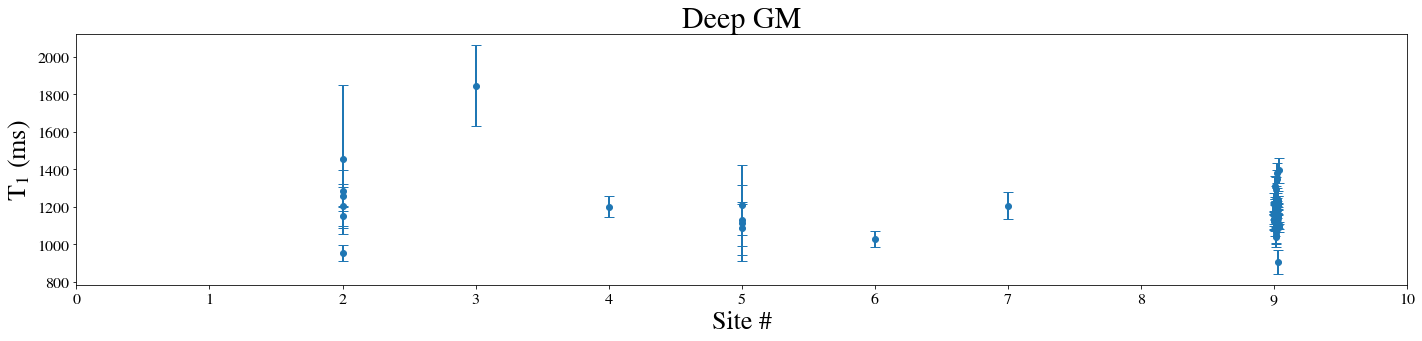

In [11]:
fig_id = plot_single_scatter(x=indexes,
                             y=deepgm_mean,
                             y_std=deepgm_std,
                             title='Deep GM',
                             x_label='Site #',
                             y_label="T$_1$ (ms)",
                             file_prefix="GM_deep",
                             folder_path=output_folder,
                             fig_id=fig_id,
                             y_type='site')

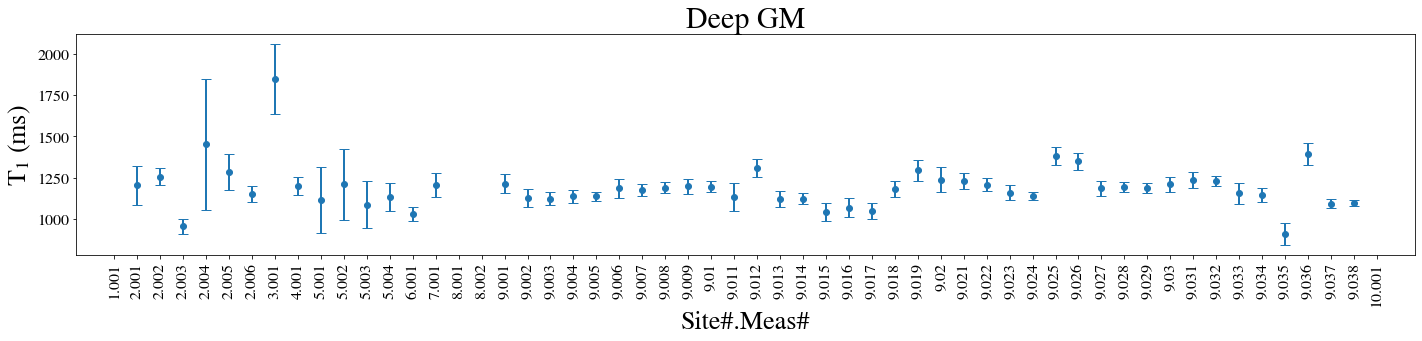

In [12]:
fig_id = plot_single_scatter(x=indexes.map(str),
                            y=deepgm_mean,
                            y_std=deepgm_std,
                            title='Deep GM',
                            x_label='Site#.Meas#',
                            y_label="T$_1$ (ms)",
                            file_prefix="GM_deep",
                            folder_path=output_folder,
                            fig_id=fig_id,
                            y_type='meas')

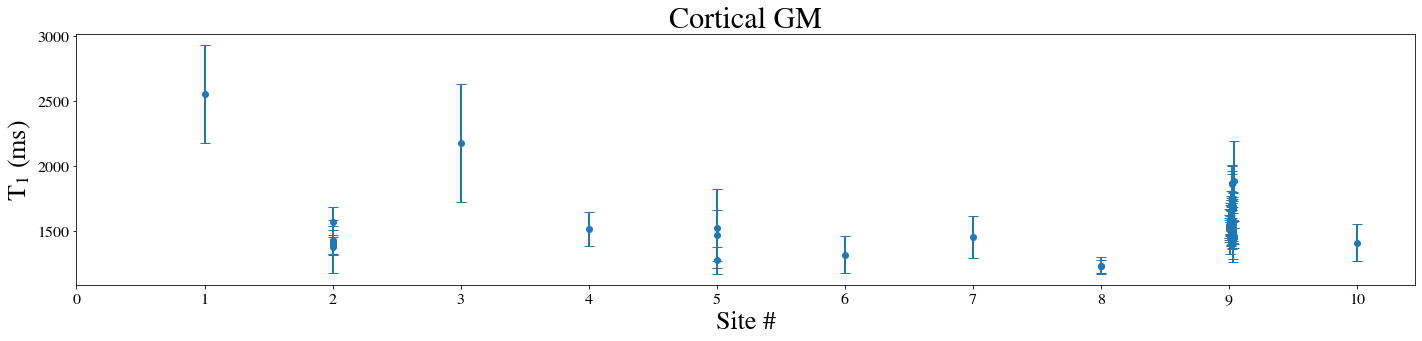

In [13]:
fig_id = plot_single_scatter(x=indexes,
                             y=cgm_mean,
                             y_std=cgm_std,
                             title='Cortical GM',
                             x_label='Site #',
                             y_label="T$_1$ (ms)",
                             file_prefix="GM_cortical",
                             folder_path=output_folder,
                             fig_id=fig_id,
                             y_type='site')

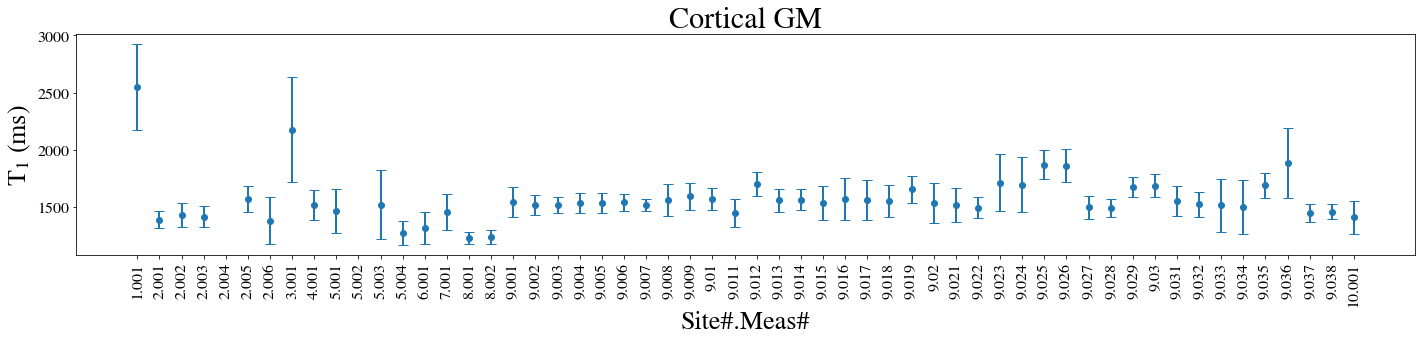

In [14]:
fig_id = plot_single_scatter(x=indexes.map(str),
                             y=cgm_mean,
                             y_std=cgm_std,
                             title='Cortical GM',
                             x_label='Site#.Meas#',
                             y_label="T$_1$ (ms)",
                             file_prefix="GM_cortical",
                             folder_path=output_folder,
                             fig_id=fig_id,
                             y_type='meas')

## Subplots

/Users/mathieuboudreau/opt/anaconda3/envs/rrsg_analysis/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  del sys.path[0]


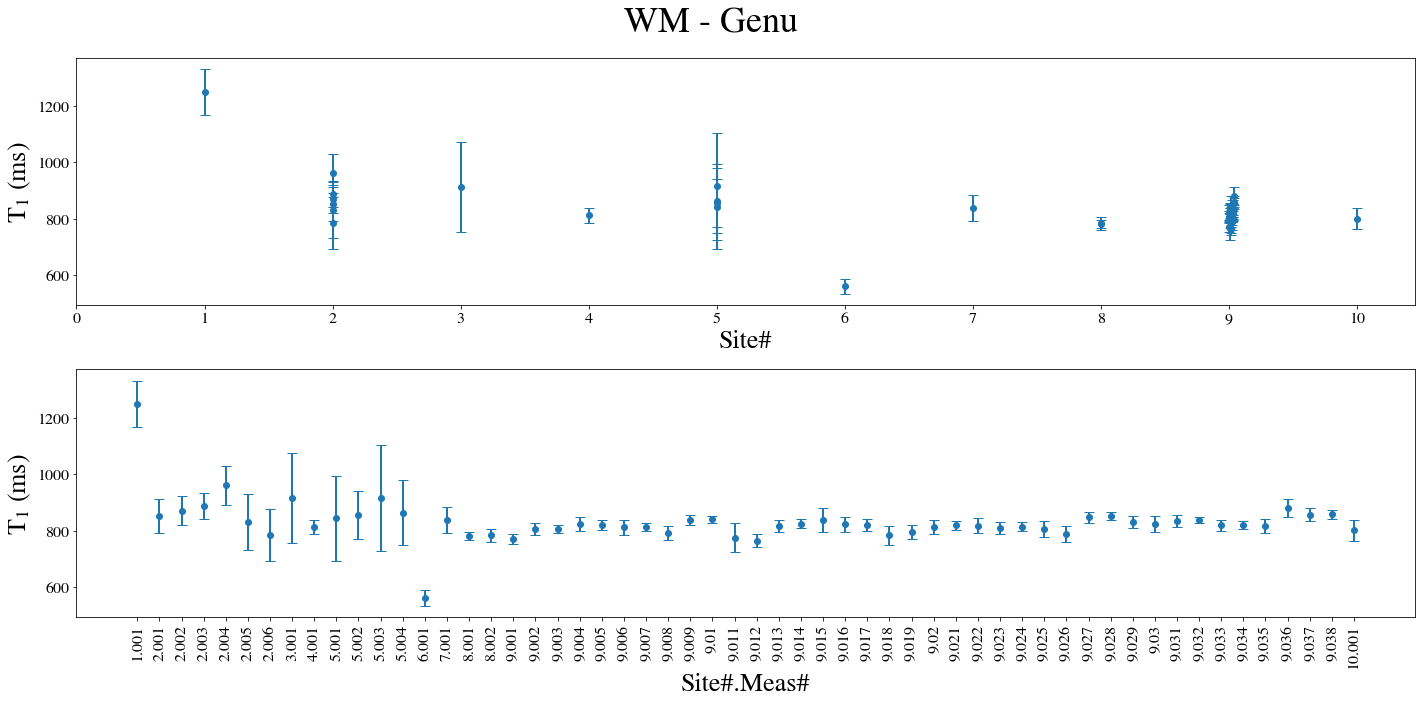

In [15]:
plt.rcParams["figure.figsize"] = (20,10)

fig, axs = plt.subplots(2)
fig.suptitle('WM - Genu', fontsize=36)
axs[0].errorbar(indexes,genu_mean, genu_std, fmt='o', solid_capstyle='projecting', capsize=5)
axs[0].set_ylabel("T$_1$ (ms)", fontsize=26)
axs[0].set_xlabel('Site#', fontsize=26)
axs[0].set_xticks(np.arange(0, np.max(indexes), step=1))

axs[1].errorbar(indexes.map(str),genu_mean, genu_std, fmt='o', solid_capstyle='projecting', capsize=5)
axs[1].set_ylabel("T$_1$ (ms)", fontsize=26)
axs[1].set_xlabel('Site#.Meas#', fontsize=26)
axs[1].set_xticklabels(labels=indexes.map(str), rotation=90)

plt.show()

fig.savefig(Path('plots/') / (str(fig_id) + '.svg'), facecolor='white')
fig.savefig(Path('plots/') / (str(fig_id) + '.png'), facecolor='white')
fig_id = fig_id + 1

/Users/mathieuboudreau/opt/anaconda3/envs/rrsg_analysis/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  del sys.path[0]


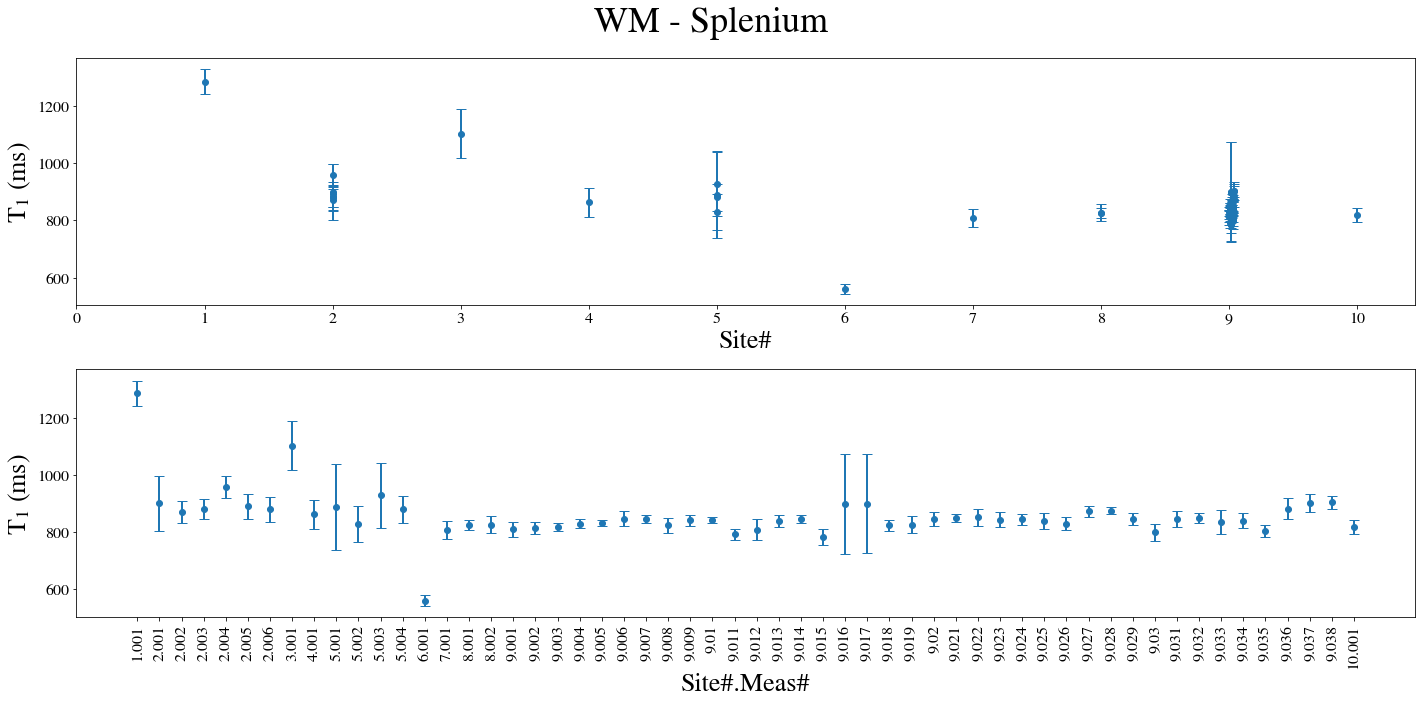

In [16]:
plt.rcParams["figure.figsize"] = (20,10)

fig, axs = plt.subplots(2)
fig.suptitle('WM - Splenium', fontsize=36)
axs[0].errorbar(indexes,splenium_mean, splenium_std, fmt='o', solid_capstyle='projecting', capsize=5)
axs[0].set_ylabel("T$_1$ (ms)", fontsize=26)
axs[0].set_xlabel('Site#', fontsize=26)
axs[0].set_xticks(np.arange(0, np.max(indexes), step=1))

axs[1].errorbar(indexes.map(str),splenium_mean, splenium_std, fmt='o', solid_capstyle='projecting', capsize=5)
axs[1].set_ylabel("T$_1$ (ms)", fontsize=26)
axs[1].set_xlabel('Site#.Meas#', fontsize=26)
axs[1].set_xticklabels(labels=indexes.map(str), rotation=90)

plt.show()

fig.savefig(Path('plots/') / (str(fig_id) + '.svg'), facecolor='white')
fig.savefig(Path('plots/') / (str(fig_id) + '.png'), facecolor='white')
fig_id = fig_id + 1

/Users/mathieuboudreau/opt/anaconda3/envs/rrsg_analysis/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  del sys.path[0]


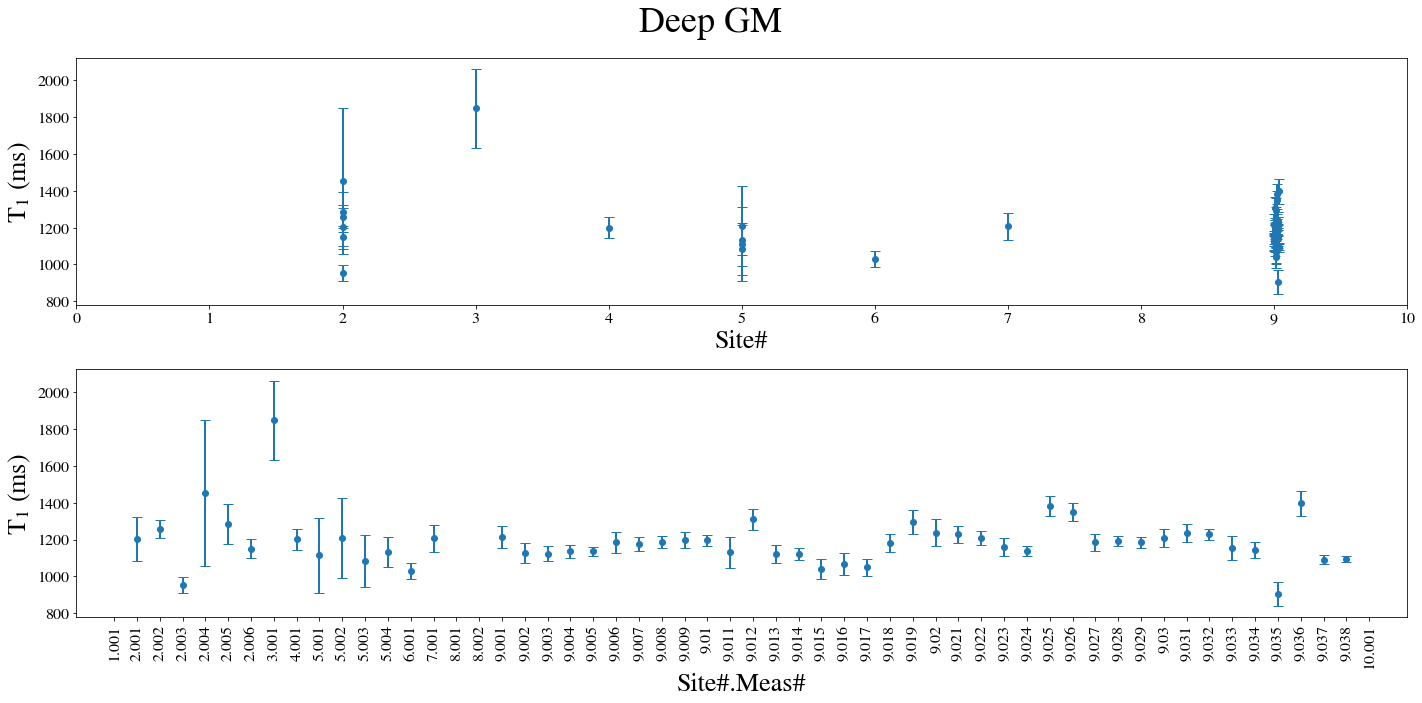

In [17]:
plt.rcParams["figure.figsize"] = (20,10)

fig, axs = plt.subplots(2)
fig.suptitle('Deep GM', fontsize=36)
axs[0].errorbar(indexes,deepgm_mean, deepgm_std, fmt='o', solid_capstyle='projecting', capsize=5)
axs[0].set_ylabel("T$_1$ (ms)", fontsize=26)
axs[0].set_xlabel('Site#', fontsize=26)
axs[0].set_xticks(np.arange(0, np.max(indexes), step=1))

axs[1].errorbar(indexes.map(str),deepgm_mean, deepgm_std, fmt='o', solid_capstyle='projecting', capsize=5)
axs[1].set_ylabel("T$_1$ (ms)", fontsize=26)
axs[1].set_xlabel('Site#.Meas#', fontsize=26)
axs[1].set_xticklabels(labels=indexes.map(str), rotation=90)

plt.show()

fig.savefig(Path('plots/') / (str(fig_id) + '.svg'), facecolor='white')
fig.savefig(Path('plots/') / (str(fig_id) + '.png'), facecolor='white')
fig_id = fig_id + 1

/Users/mathieuboudreau/opt/anaconda3/envs/rrsg_analysis/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  del sys.path[0]


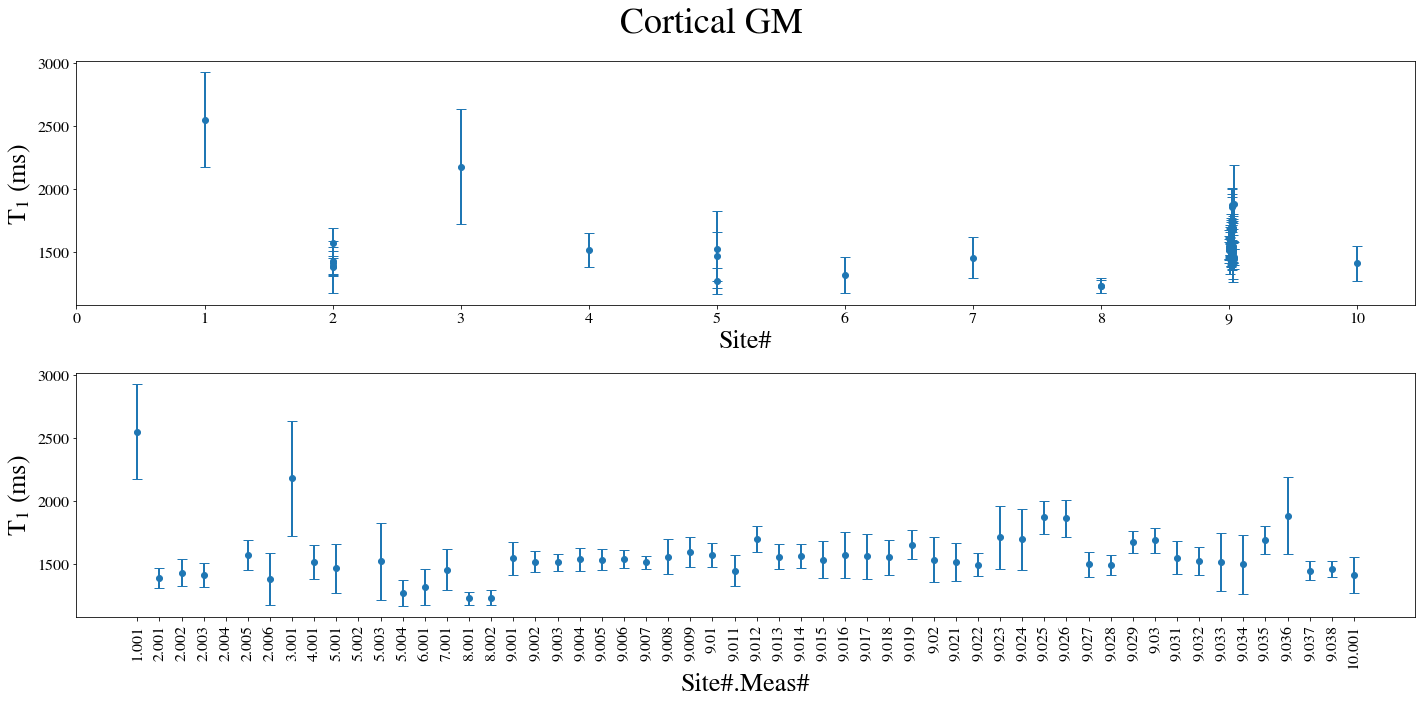

In [18]:
plt.rcParams["figure.figsize"] = (20,10)

fig, axs = plt.subplots(2)
fig.suptitle('Cortical GM', fontsize=36)
axs[0].errorbar(indexes,cgm_mean, cgm_std, fmt='o', solid_capstyle='projecting', capsize=5)
axs[0].set_ylabel("T$_1$ (ms)", fontsize=26)
axs[0].set_xlabel('Site#', fontsize=26)
axs[0].set_xticks(np.arange(0, np.max(indexes), step=1))

axs[1].errorbar(indexes.map(str),cgm_mean, cgm_std, fmt='o', solid_capstyle='projecting', capsize=5)
axs[1].set_ylabel("T$_1$ (ms)", fontsize=26)
axs[1].set_xlabel('Site#.Meas#', fontsize=26)
axs[1].set_xticklabels(labels=indexes.map(str), rotation=90)

plt.show()
fig.savefig(Path('plots/') / (str(fig_id) + '.svg'), facecolor='white')
fig.savefig(Path('plots/') / (str(fig_id) + '.png'), facecolor='white')
fig_id = fig_id + 1